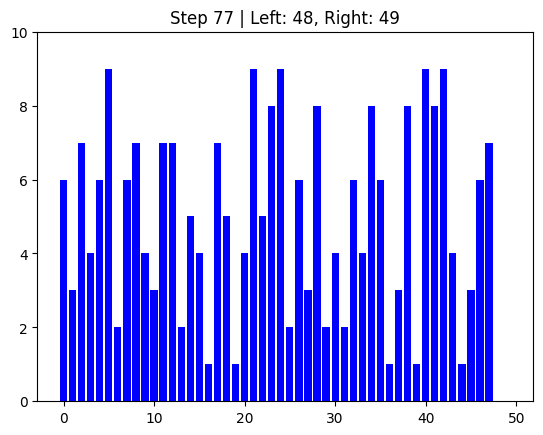

In [13]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import display, clear_output

def pushZerosToEnd(arr):
    left = 0
    steps = []
    pointers = []
    
    for right in range(len(arr)):
        steps.append(arr.copy())
        pointers.append((left, right))
        
        if arr[left] == 0 and arr[right] != 0:
            arr[left], arr[right] = arr[right], arr[left]
            steps.append(arr.copy())
            pointers.append((left, right))
        
        if arr[left] != 0:
            left += 1
    
    steps.append(arr.copy())
    pointers.append((left, len(arr) - 1))
    
    return arr, steps, pointers

def visualize():
    for frame in range(len(steps)):
        clear_output(wait=True)
        fig, ax = plt.subplots()
        left, right = pointers[frame]
        colors = ['red' if x == 0 else 'blue' for x in steps[frame]]
        colors[left] = 'green'  # Mark left pointer
        colors[right] = 'purple'  # Mark right pointer
        
        ax.bar(range(len(steps[frame])), steps[frame], color=colors)
        ax.set_ylim(0, max(original_arr) + 1)
        ax.set_title(f'Step {frame} | Left: {left}, Right: {right}')
        display(fig)
        plt.close(fig)
        plt.pause(0.5)  # Add delay to slow down animation

# Example input with 50 numbers
np.random.seed(42)
original_arr = np.random.choice([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], size=50, replace=True).tolist()
sorted_arr, steps, pointers = pushZerosToEnd(original_arr.copy())

# Run visualization
visualize()